In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Check TensorFlow version
print(f'TensorFlow Version: {tf.__version__}')


2024-06-12 10:55:49.400429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
TensorFlow Version: 2.12.0


In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a channel dimension (since we have grayscale images)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')


11490434/11490434 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [3]:
# Define the model
model = models.Sequential()

# Flatten layer: Converts the 2D image (28x28) into a 1D array (784)
model.add(layers.Flatten(input_shape=(28, 28, 1)))

# Dense layers: Fully connected layers
model.add(layers.Dense(128, activation='relu'))  # First hidden layer with ReLU activation
model.add(layers.Dense(64, activation='relu'))   # Second hidden layer with ReLU activation
model.add(layers.Dense(10, activation='softmax')) # Output layer with softmax activation

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2302 - accuracy: 0.9330 - val_loss: 0.1125 - val_accuracy: 0.9657
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0946 - accuracy: 0.9709 - val_loss: 0.0936 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.0892 - val_accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0785 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0716 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0676 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.0907 - val_accuracy:

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9805
Test accuracy: 0.9805


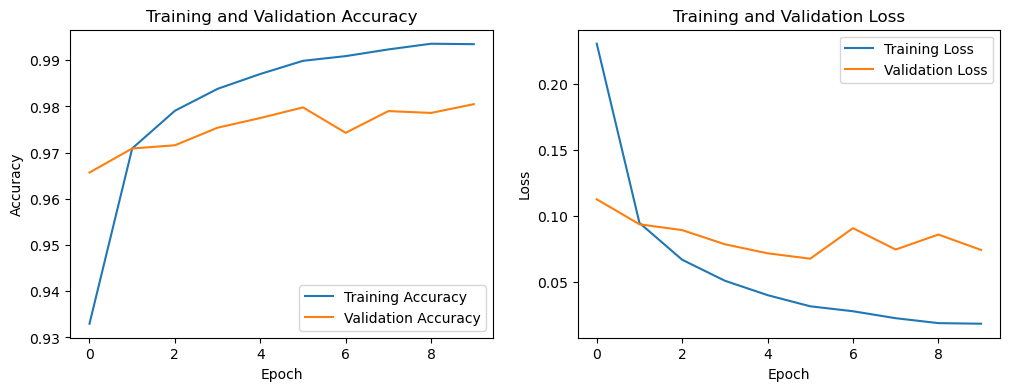

In [7]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()